In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 29 18:31:21 2020

@author: sonakochkanyan
"""


import pandas as pd
import numpy as np
import os
import math
import string as str
import datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scipy.stats
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score, cross_val_predict, train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
#import plotly
#import plotly.graph_objs as go
#import plotly.express as px
#from nltk.tokenize.treebank import TreebankWordDetokenizer as detoken
#from wordcloud import WordCloud
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from scipy.stats import iqr
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import stop_words


data=pd.read_fwf("/Users/sonakochkanyan/Documents/BOT/train2.txt", header=None)
data.fillna("",inplace=True)
data['new'] = data.apply(''.join, axis=1)
#data=data["new"]

data1=pd.read_fwf("/Users/sonakochkanyan/Documents/BOT/train1.txt", header=None)
data1.fillna("",inplace=True)
data1['new'] = data1.apply(''.join, axis=1)
wordsin1=cv.transform(data1['new'])

cv=CountVectorizer(stop_words='english',ngram_range=(1,2))
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(data['new'])
tfidf_transformer=TfidfTransformer(use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame([tfidf_transformer.idf_, cv.get_feature_names()]).T

df_idf.columns=["idf_weights","Terms"]
# sort ascending
df_idf.sort_values(by=['idf_weights'])

train1=tfidf_transformer.transform(wordsin1)
train1.



In [ ]:
"""
from collections import Counter
import random

import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy 


In [2]:

line_data = pd.read_csv('/Users/sonakochkanyan/Documents/BOT/movie_lines.tsv', encoding='utf-8-sig',header=None)
line_data = line_data[0].str.split('\t').to_list()
print(f'in total {len(line_data)} utterances')
line_data[:4]

line_data = [l for l in line_data if len(l) == 5]
print(f'in total {len(line_data)} utterances')
line_data[:4]

lines = pd.DataFrame(line_data, columns=['line_id', 'speaker_id', 'movie_id', 'speaker_name', 'text'])
lines = lines.set_index('line_id')
lines.loc['L1000']

conversation_data = pd.read_csv('/Users/sonakochkanyan/Documents/BOT/movie_conversations.tsv', encoding='utf-8-sig', sep='\t', header=None)
conversation_data = conversation_data.rename(columns={0: 'speaker1_id', 1: 'speaker2_id', 2: 'movie_id', 3: 'line_ids'})
conversation_data

def build_conversation(line_ids):
    id_list = line_ids[1:-2].replace('\'', '').split(' ')
    def build_utterance(line):
        return (line.speaker_id, line.text)
    try:
        return [build_utterance(lines.loc[line_id]) for line_id in id_list]
    except KeyError:
        return []

conversations = [build_conversation(line_ids) for line_ids in tqdm(conversation_data.line_ids)]
print(f'in total {len(conversations)} conversations')
conversations[:4]

in total 293368 utterances
in total 293020 utterances



in total 83097 conversations


[[('u0',
   'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.'),
  ('u2',
   "Well I thought we'd start with pronunciation if that's okay with you."),
  ('u0', 'Not the hacking and gagging and spitting part.  Please.'),
  ('u2',
   "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?")],
 [('u0', "You're asking me out.  That's so cute. What's your name again?"),
  ('u2', 'Forget it.')],
 [('u0', "No no it's my fault -- we didn't have a proper introduction ---"),
  ('u2', 'Cameron.'),
  ('u0',
   "The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does."),
  ('u2', 'Seems like she could get a date easy enough...')],
 [('u2', 'Why?'),
  ('u0',
   'Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something.'),
  ('u2', "That's a shame.")]]

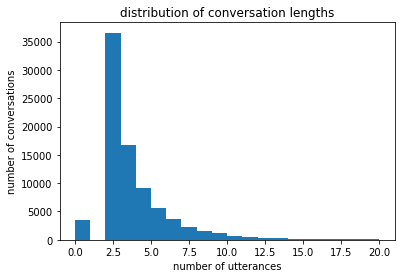

In [3]:
plt.title('distribution of conversation lengths')
plt.xlabel('number of utterances')
plt.ylabel('number of conversations')
plt.hist([len(c) for c in conversations], bins=20, range=(0, 20))
plt.show()

In [4]:
conversations = [c for c in conversations if len(c) > 2]
print(f'{len(conversations)} conversations remain')

43093 conversations remain


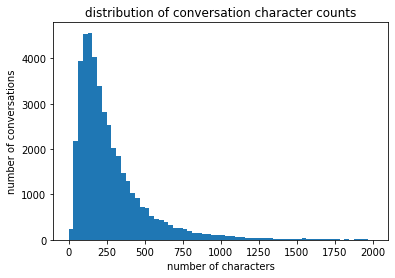

In [5]:
plt.title('distribution of conversation character counts')
plt.xlabel('number of characters')
plt.ylabel('number of conversations')
plt.hist([sum(len(u[1]) for u in c) for c in conversations], bins=64, range=(0, 2000))
plt.show()

In [6]:
min_char_count = 128
conversations = [c for c in conversations if sum(len(u[1]) for u in c) > min_char_count]
print(f'{len(conversations)} conversations remain')

31609 conversations remain


In [7]:
def speaker_repeated(conversation):
    for idx in range(1, len(conversation)):
        if conversation[idx][0] == conversation[idx-1][0]:
            return True
    return False

conversations = [conv for conv in conversations if not speaker_repeated(conv)]
print(f'{len(conversations)} conversations remain')

31131 conversations remain


In [8]:
print(f'in total {sum(sum(len(u[1]) for u in c) for c in conversations)} characters in conversations')

in total 10913335 characters in conversations


In [9]:
char_usage = Counter(''.join([utterance[1] for conv in conversations for utterance in conv]))
chars_by_frequency = sorted(char_usage, key=lambda char: -char_usage[char])
[(char, char_usage[char]) for char in chars_by_frequency]

[(' ', 1989170),
 ('e', 942277),
 ('t', 750844),
 ('o', 731494),
 ('a', 596492),
 ('n', 529971),
 ('i', 477385),
 ('h', 451768),
 ('s', 443520),
 ('r', 415951),
 ('l', 328943),
 ('u', 321239),
 ('.', 309286),
 ('d', 284271),
 ('y', 249173),
 ('m', 206707),
 ('w', 187066),
 ('g', 181527),
 ('c', 158013),
 ("'", 139791),
 ('f', 133034),
 ('I', 115685),
 ('k', 113087),
 ('b', 111458),
 ('p', 109737),
 ('v', 79962),
 ('?', 67186),
 ('-', 49380),
 ('W', 40599),
 ('T', 37955),
 ('Y', 34489),
 ('A', 25395),
 ('S', 24690),
 ('H', 22304),
 ('!', 19531),
 ('M', 18525),
 ('N', 18193),
 ('B', 17086),
 ('D', 15446),
 ('C', 14048),
 ('j', 13817),
 ('O', 13535),
 ('L', 11540),
 ('G', 10297),
 ('x', 10041),
 ('E', 8402),
 ('J', 8276),
 ('P', 8006),
 ('F', 7837),
 ('R', 7736),
 ('"', 6303),
 ('z', 5653),
 ('<', 4644),
 ('>', 4643),
 ('q', 3996),
 ('K', 3578),
 ('U', 3199),
 ('V', 2529),
 ('/', 2432),
 ('0', 1562),
 ('1', 1267),
 (':', 1147),
 (';', 1090),
 ('\x92', 934),
 ('\x97', 832),
 ('2', 735),
 (

In [10]:
frequent_chars = [char for char in sorted(char_usage) if char_usage[char] >= 100]
print(f'{len(frequent_chars)} frequent chars: {frequent_chars}')

82 frequent chars: [' ', '!', '"', '$', '&', "'", '*', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x92', '\x96', '\x97']


In [11]:
empty_token = len(frequent_chars)
unknown_token = len(frequent_chars) + 1
speaker_change_token = len(frequent_chars) + 2
num_tokens = len(frequent_chars) + 3

def char_to_token(char):
    if char not in frequent_chars:
        return unknown_token
    return frequent_chars.index(char)

def utterance_to_tokens(utterance):
    return [char_to_token(char) for char in utterance[1]] + [speaker_change_token]

def conversation_to_tokens(conversation):
    result = []
    for utterance in conversation:
        result += utterance_to_tokens(utterance)
    return result

conversations_tokenized = [conversation_to_tokens(conversation) for conversation in tqdm(conversations)]
print(f'example conversation, tokenized: {conversations_tokenized[0]}')


example conversation, tokenized: [27, 53, 66, 0, 75, 57, 0, 65, 53, 63, 57, 0, 72, 60, 61, 71, 0, 69, 73, 61, 55, 63, 24, 0, 0, 42, 67, 76, 53, 66, 66, 57, 0, 35, 67, 70, 70, 61, 66, 57, 0, 53, 66, 56, 0, 25, 66, 56, 70, 57, 75, 0, 26, 53, 70, 70, 57, 72, 72, 0, 53, 70, 57, 0, 60, 53, 74, 61, 66, 59, 0, 53, 66, 0, 61, 66, 55, 70, 57, 56, 61, 54, 64, 77, 0, 60, 67, 70, 70, 57, 66, 56, 67, 73, 71, 0, 68, 73, 54, 64, 61, 55, 0, 54, 70, 57, 53, 63, 7, 0, 73, 68, 0, 67, 66, 0, 72, 60, 57, 0, 69, 73, 53, 56, 8, 0, 0, 25, 59, 53, 61, 66, 8, 84, 47, 57, 64, 64, 0, 33, 0, 72, 60, 67, 73, 59, 60, 72, 0, 75, 57, 5, 56, 0, 71, 72, 53, 70, 72, 0, 75, 61, 72, 60, 0, 68, 70, 67, 66, 73, 66, 55, 61, 53, 72, 61, 67, 66, 0, 61, 58, 0, 72, 60, 53, 72, 5, 71, 0, 67, 63, 53, 77, 0, 75, 61, 72, 60, 0, 77, 67, 73, 8, 84, 38, 67, 72, 0, 72, 60, 57, 0, 60, 53, 55, 63, 61, 66, 59, 0, 53, 66, 56, 0, 59, 53, 59, 59, 61, 66, 59, 0, 53, 66, 56, 0, 71, 68, 61, 72, 72, 61, 66, 59, 0, 68, 53, 70, 72, 8, 0, 0, 40, 64,

In [12]:
def pad_empty(tokens, desired_length):
    return [empty_token] * (desired_length - len(tokens)) + tokens

def random_example(hist_length):
    '''
    Returns tuple of:
        * hist_length tokens
        * the token that followed them directly
    '''
    conversation = random.choice(conversations_tokenized)
    start = random.randint(-hist_length, len(conversation) - hist_length - 1)
    end = start + hist_length
    hist = conversation[max(start, 0):end]
    hist = pad_empty(hist, hist_length)
    return (tf.constant(hist), tf.constant(conversation[end]))

print(random_example(32))

(<tf.Tensor: id=0, shape=(32,), dtype=int32, numpy=
array([72,  0, 61, 72,  0, 75, 53, 71,  0, 53, 64, 64,  0, 67, 74, 57, 70,
        8, 84, 49, 57, 53, 60,  8,  0, 37, 77,  0, 67, 75, 66,  0],
      dtype=int32)>, <tf.Tensor: id=1, shape=(), dtype=int32, numpy=54>)


In [13]:
def generate_examples(batch_size, hist_length, labelled=True):
    while True:
        examples = [random_example(hist_length) for _ in range(batch_size)]
        inputs = tf.stack([ex[0] for ex in examples])
        targets = tf.stack([ex[1] for ex in examples])
        if labelled:
            yield inputs, targets
        else:
            yield inputs

iter(generate_examples(2, 16)).__next__()

(<tf.Tensor: id=6, shape=(2, 16), dtype=int32, numpy=
 array([[72, 60, 70, 57, 57,  0, 56, 53, 77, 71,  0, 56, 53, 70, 64, 61],
        [67, 65, 57,  0, 67, 74, 57, 70, 24,  0, 44, 60, 57, 66,  0, 53]],
       dtype=int32)>,
 <tf.Tensor: id=7, shape=(2,), dtype=int32, numpy=array([66, 54], dtype=int32)>)

In [14]:
model = Sequential()
model.add(Embedding(input_dim=num_tokens, output_dim=64))
model.add(LSTM(units=1024, return_sequences=True, input_shape=(None, num_tokens)))
model.add(Dropout(.5))
model.add(LSTM(units=512))
model.add(Dense(num_tokens))
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          5440      
_________________________________________________________________
lstm (LSTM)                  (None, None, 1024)        4460544   
_________________________________________________________________
dropout (Dropout)            (None, None, 1024)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               3147776   
_________________________________________________________________
dense (Dense)                (None, 85)                43605     
Total params: 7,657,365
Trainable params: 7,657,365
Non-trainable params: 0
_________________________________________________________________


In [15]:
training_history = model.fit_generator(generate_examples(batch_size=128, hist_length=128), epochs=32, steps_per_epoch=1)

Epoch 1/32
1/1 [==============================] - 51s 51s/step - loss: 4.4428 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/32
1/1 [==============================] - 65s 65s/step - loss: 4.4123 - sparse_categorical_accuracy: 0.1797
Epoch 3/32
1/1 [==============================] - 1458s 1458s/step - loss: 3.9417 - sparse_categorical_accuracy: 0.1406
Epoch 4/32
1/1 [==============================] - 63s 63s/step - loss: 4.7113 - sparse_categorical_accuracy: 0.1719
Epoch 5/32
1/1 [==============================] - 114s 114s/step - loss: 3.6357 - sparse_categorical_accuracy: 0.0469
Epoch 6/32
1/1 [==============================] - 68s 68s/step - loss: 3.9249 - sparse_categorical_accuracy: 0.0625
Epoch 7/32
1/1 [==============================] - 78s 78s/step - loss: 3.7133 - sparse_categorical_accuracy: 0.1094
Epoch 8/32
1/1 [==============================] - 80s 80s/step - loss: 3.4410 - sparse_categorical_accuracy: 0.0859
Epoch 9/32
1/1 [==============================] - 73s 73s/step

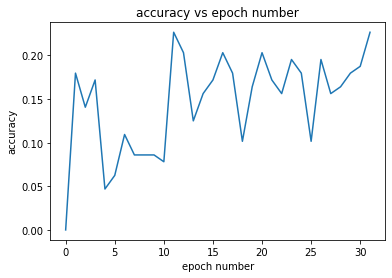

In [16]:
plt.title('accuracy vs epoch number')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.plot(training_history.history['sparse_categorical_accuracy'])
plt.show()

In [19]:
del str
def logits_to_tokens(logits, temperature=1.0):
    one_hot = tf.nn.softmax(logits / temperature)
    result = []
    for row in one_hot:
        result += random.choices(population=list(range(num_tokens)), weights=row.numpy(), k=1)
    return result


def token_to_char(token):
    if token < len(frequent_chars):
        return frequent_chars[token]
    raise ValueError('special token - not a character')


def continue_tokens(tokens, max_length=256, temperature=1.0):
    '''Add a new utterance to the (tokenized) conversation'''
    result = tokens.copy()
    result = pad_empty(result, 16)
    
    for _ in trange(max_length):
        logits = model.predict([[tf.constant(result)]])
        token = logits_to_tokens(logits, temperature=temperature)[0]
        if token == speaker_change_token:
            break
        result.append(token)
    
    result.append(speaker_change_token)
    return result


def tokens_to_conversation(tokens):
    result = []
    to_process = tokens.copy()
    while len(to_process) > 0:
        text = ''
        while len(to_process) > 0:
            token = to_process.pop(0)
            if token == speaker_change_token:
                break
            try:
                text += token_to_char(token)
            except ValueError:
                pass
        result.append((str(len(result) % 2), text))
    return result


def continue_conversation(conversation, max_length=256, temperature=1.0):
    '''Like continue_tokens, but operates on structured conversations'''
    tokens = continue_tokens(conversation_to_tokens(conversation), max_length=max_length, temperature=temperature)
    return tokens_to_conversation(tokens)
for conversation in conversations[:4]:
    print(continue_conversation(conversation, max_length=256))


[('0', 'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.'), ('1', "Well I thought we'd start with pronunciation if that's okay with you."), ('0', 'Not the hacking and gagging and spitting part.  Please.'), ('1', "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?"), ('0', 'Jo leoep dhr')]


[('0', "No no it's my fault -- we didn't have a proper introduction ---"), ('1', 'Cameron.'), ('0', "The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does."), ('1', 'Seems like she could get a date easy enough...'), ('0', 'Wdakaoyt aj ri')]


[('0', 'Why?'), ('1', 'Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something.'), ('0', "That's a shame."), ('1', "stka iecrf uyworsuoenNbhneIaa g.b>a  a atoi eawhmdh .to'behi  aoh.tr eitkhrsmW  I hldra toe")]


[('0', "C'esc ma tete. This is my head"), ('1', "Right.  See?  You're ready for the quiz."), ('0', "I don't want to know how to say that though.  I want to know useful things. Like where the good stores are.  How much does champagne cost?  Stuff like Chat.  I have never in my life had to point out my head to someone."), ('1', "That's because it's such a nice one."), ('0', 'Forget French.'), ('1', 'okmofn ')]


In [24]:
for conversation in conversations[:3]:
    print(continue_conversation(conversation, max_length=256))

[('0', 'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.'), ('1', "Well I thought we'd start with pronunciation if that's okay with you."), ('0', 'Not the hacking and gagging and spitting part.  Please.'), ('1', "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?"), ('0', 'n  lso')]


[('0', "No no it's my fault -- we didn't have a proper introduction ---"), ('1', 'Cameron.'), ('0', "The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does."), ('1', 'Seems like she could get a date easy enough...'), ('0', 'safWf')]


[('0', 'Why?'), ('1', 'Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something.'), ('0', "That's a shame."), ('1', "iwik'enrs")]
